## 1차 과제 - 고객 유지/이탈 자유 분석
- 주제: 가입 고객 이탈 데이터를 분석하여 기업에 인사이트 제공
- 데이터: Customer Churn Data(train data가 따로 있으나 너무 커서 test data만 사용, 예측 성능 향상을 원한다면 train data 사용해도 무방)
https://www.kaggle.com/datasets/muhammadshahidazeem/customer-churn-dataset?select=customer_churn_dataset-training-master.csv
- 사용 라이브러리: 자유

본 과제는 여러분들의 실력을 확인하고자 출제한 과제로 어떠한 가이드라인도 제공하거나 제약하지 않으며 자유롭게 분석하시면 됩니다.

분석이나 예측 어느 쪽이든 상관없으며 몇가지 조건만 유의하여 주시기 바랍니다.

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### 조건
1. 기본적인 분석 과정은 EDA(데이터 탐색) > 전처리 > 분석(예측) 진행 > 결과 해석 으로 진행되지만 약간의 수정 허용
2. EDA 과정에서 최소 2개의 시각화 모형(그래프) 사용
3. 분석 및 예측 시 최소 2개의 모형(모델) 사용
4. 전처리는 자유롭게 진행하며 추가적인 데이터 사용이 필요하다면 허용

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DAT/24-2/1주차 과제/customer_churn_dataset-training-master.csv')

In [63]:
df

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.00,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.00,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.00,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.00,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.00,20.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
440828,449995.0,42.0,Male,54.0,15.0,1.0,3.0,Premium,Annual,716.38,8.0,0.0
440829,449996.0,25.0,Female,8.0,13.0,1.0,20.0,Premium,Annual,745.38,2.0,0.0
440830,449997.0,26.0,Male,35.0,27.0,1.0,5.0,Standard,Quarterly,977.31,9.0,0.0
440831,449998.0,28.0,Male,55.0,14.0,2.0,0.0,Standard,Quarterly,602.55,2.0,0.0


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440833 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         440832 non-null  float64
 1   Age                440832 non-null  float64
 2   Gender             440832 non-null  object 
 3   Tenure             440832 non-null  float64
 4   Usage Frequency    440832 non-null  float64
 5   Support Calls      440832 non-null  float64
 6   Payment Delay      440832 non-null  float64
 7   Subscription Type  440832 non-null  object 
 8   Contract Length    440832 non-null  object 
 9   Total Spend        440832 non-null  float64
 10  Last Interaction   440832 non-null  float64
 11  Churn              440832 non-null  float64
dtypes: float64(9), object(3)
memory usage: 40.4+ MB


In [65]:
df.columns
# tenure: 재임기간?

Index(['CustomerID', 'Age', 'Gender', 'Tenure', 'Usage Frequency',
       'Support Calls', 'Payment Delay', 'Subscription Type',
       'Contract Length', 'Total Spend', 'Last Interaction', 'Churn'],
      dtype='object')

In [66]:
df.describe()

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000
mean,225398.667955,39.373153,31.256336,15.807494,3.604437,12.965722,631.616223,14.480868,0.567107
std,129531.918550,12.442369,17.255727,8.586242,3.070218,8.258063,240.803001,8.596208,0.495477
min,2.000000,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,113621.750000,29.000000,16.000000,9.000000,1.000000,6.000000,480.000000,7.000000,0.000000
50%,226125.500000,39.000000,32.000000,16.000000,3.000000,12.000000,661.000000,14.000000,1.000000
75%,337739.250000,48.000000,46.000000,23.000000,6.000000,19.000000,830.000000,22.000000,1.000000
max,449999.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


In [67]:
df.isna().sum()
# null 값 1개!

,0
CustomerID,1
Age,1
Gender,1
Tenure,1
Usage Frequency,1
Support Calls,1
Payment Delay,1
Subscription Type,1
Contract Length,1
Total Spend,1


In [68]:
#일련번호 삭제
df = df.drop('CustomerID', axis=1)

## Target: churn - 고객 이탈 여부
total spend 표준편차 매우 큼
Subscription, Contract Length 범주형

#EDA

In [69]:
columns_list = df.columns.tolist()
columns_list

['Age',
 'Gender',
 'Tenure',
 'Usage Frequency',
 'Support Calls',
 'Payment Delay',
 'Subscription Type',
 'Contract Length',
 'Total Spend',
 'Last Interaction',
 'Churn']

In [70]:
cont_columns = ['Age', 'Tenure',
 'Usage Frequency',
 'Support Calls',
 'Payment Delay',
 'Total Spend',
 'Last Interaction']

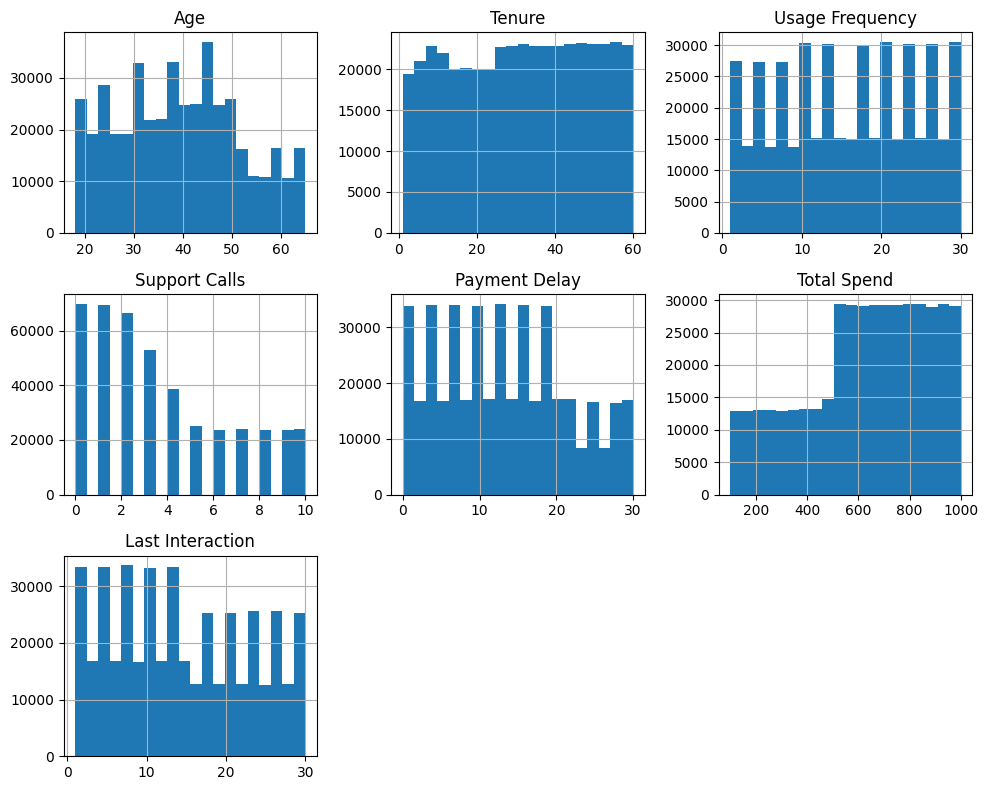

In [71]:
# 히스토그램 그리기
df[cont_columns].hist(figsize=(10, 8), bins=20)
plt.tight_layout()
plt.show()


In [72]:
df.value_counts('Churn')

,count
Churn,
1.0,249999
0.0,190833


In [73]:
for column in columns_list:
    print(df[[column]].value_counts())


Age 
50.0    13527
42.0    12578
40.0    12417
48.0    12379
47.0    12369
46.0    12368
44.0    12344
49.0    12331
41.0    12314
43.0    12298
45.0    12265
38.0    11181
31.0    11092
35.0    11062
36.0    11031
37.0    11024
33.0    10990
39.0    10961
30.0    10907
32.0    10885
34.0    10829
26.0     9692
25.0     9647
22.0     9639
28.0     9608
21.0     9574
29.0     9571
20.0     9553
23.0     9513
27.0     9472
24.0     9465
18.0     8219
19.0     8073
59.0     5573
63.0     5560
64.0     5496
55.0     5489
56.0     5477
54.0     5472
53.0     5467
65.0     5460
51.0     5437
60.0     5430
61.0     5407
58.0     5373
52.0     5364
57.0     5361
62.0     5288
Name: count, dtype: int64
Gender
Male      250252
Female    190580
Name: count, dtype: int64
Tenure
32.0      7828
49.0      7815
56.0      7812
55.0      7777
33.0      7770
52.0      7769
30.0      7750
47.0      7747
48.0      7737
57.0      7735
38.0      7733
42.0      7718
45.0      7704
6.0       7704
43.0      770

total spend 이상치?

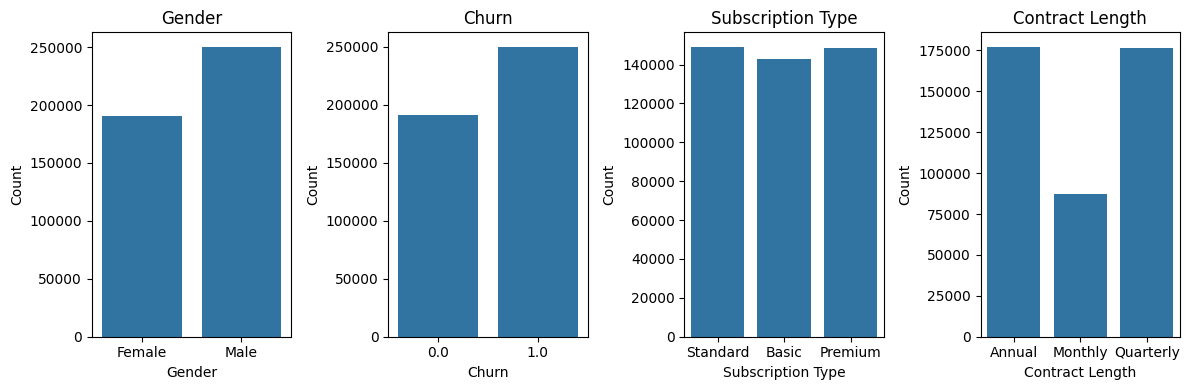

In [74]:
# #성비와 고객 이탈 여부는 막대그래프
# plt.figure(figsize=(4, 3))
# sns.countplot(x='Gender', data=df)
# plt.title('Gender')
# plt.xlabel('Gender')
# plt.ylabel('Count')

# plt.figure(figsize=(4, 3))
# sns.countplot(x='Churn', data=df)
# plt.title('Churn')
# plt.xlabel('Gender')
# plt.ylabel('Count')

# plt.figure(figsize=(4, 3))
# sns.countplot(x='Gender', hue='Churn', data=df)
# plt.title('Gender vs Churn')
# plt.xlabel('Gender')
# plt.ylabel('Count')
# plt.show()

# 그래프의 사이즈 및 레이아웃 설정 (1행 3열)
fig, axes = plt.subplots(1, 4, figsize=(12, 4))

# 첫 번째 그래프: Gender 분포
sns.countplot(x='Gender', data=df, ax=axes[0])
axes[0].set_title('Gender')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Count')

# 두 번째 그래프: Churn 분포
sns.countplot(x='Churn', data=df, ax=axes[1])
axes[1].set_title('Churn')
axes[1].set_xlabel('Churn')
axes[1].set_ylabel('Count')

# 세 번째 그래프: Gender vs Churn
sns.countplot(x='Subscription Type', data=df, ax=axes[2])
axes[2].set_title('Subscription Type')
axes[2].set_xlabel('Subscription Type')
axes[2].set_ylabel('Count')

# 네 번째 그래프: Gender vs Churn
sns.countplot(x='Contract Length', data=df, ax=axes[3])
axes[3].set_title('Contract Length')
axes[3].set_xlabel('Contract Length')
axes[3].set_ylabel('Count')

# 그래프 간격 조정
plt.tight_layout()

# 그래프 출력
plt.show()


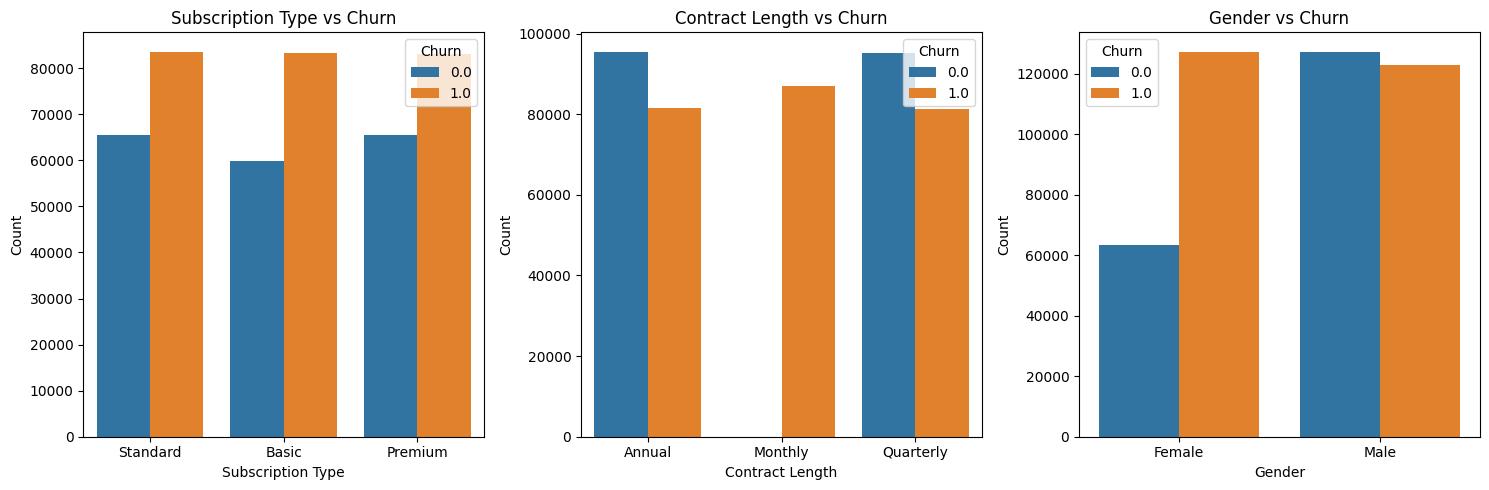

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

# 그래프의 사이즈 및 레이아웃 설정 (1행 3열)
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# 첫 번째 그래프: Subscription Type vs Churn
sns.countplot(x='Subscription Type', hue='Churn', data=df, ax=axes[0])
axes[0].set_title('Subscription Type vs Churn')
axes[0].set_xlabel('Subscription Type')
axes[0].set_ylabel('Count')

# 두 번째 그래프: Contract Length vs Churn
sns.countplot(x='Contract Length', hue='Churn', data=df, ax=axes[1])
axes[1].set_title('Contract Length vs Churn')
axes[1].set_xlabel('Contract Length')
axes[1].set_ylabel('Count')

# 세 번째 그래프: Gender vs Churn (이미 존재하는 코드)
sns.countplot(x='Gender', hue='Churn', data=df, ax=axes[2])
axes[2].set_title('Gender vs Churn')
axes[2].set_xlabel('Gender')
axes[2].set_ylabel('Count')

# 그래프 간격 조정
plt.tight_layout()

# 그래프 출력
plt.show()


monthly와 female 주목

## 결측값 - 삭제

In [76]:
df.dropna(inplace=True)

## 이상치 처리
박스플롯 수염을 벗어난 이상치 없음

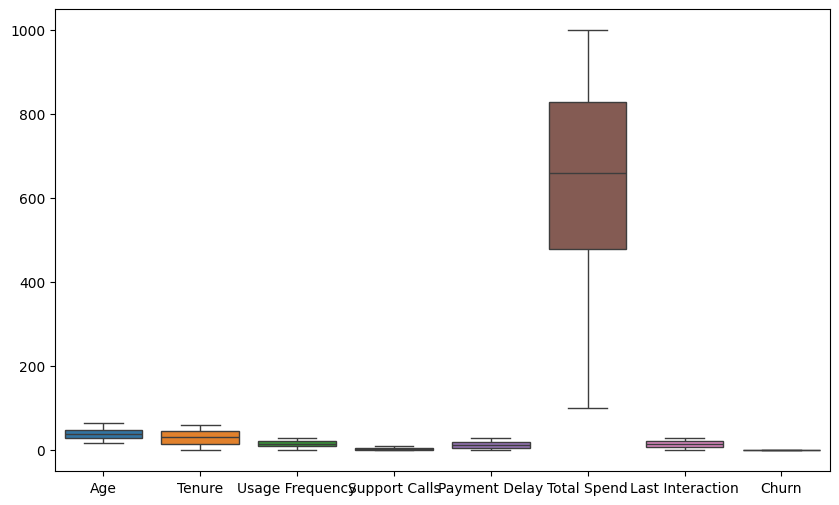

In [77]:
# 컬럼별 Boxplot 시각화
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.show()


# 상관관계 및 다중 공선성 확인
이상 무

In [78]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# VIF 계산 함수
def calculate_vif(df):
    vif_data = pd.DataFrame()
    vif_data["feature"] = df.columns

    # VIF 계산
    vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif_data

# 독립 변수만 선택 (종속 변수를 제외하고)
X = df[cont_columns] # 연속형 변수만
X = add_constant(X)  # 상수항 추가 (필수)

# VIF 확인
vif = calculate_vif(X)
print(vif)


            feature        VIF
0             const  33.351398
1               Age   1.029818
2            Tenure   1.001890
3   Usage Frequency   1.001564
4     Support Calls   1.098391
5     Payment Delay   1.037381
6       Total Spend   1.064231
7  Last Interaction   1.008707


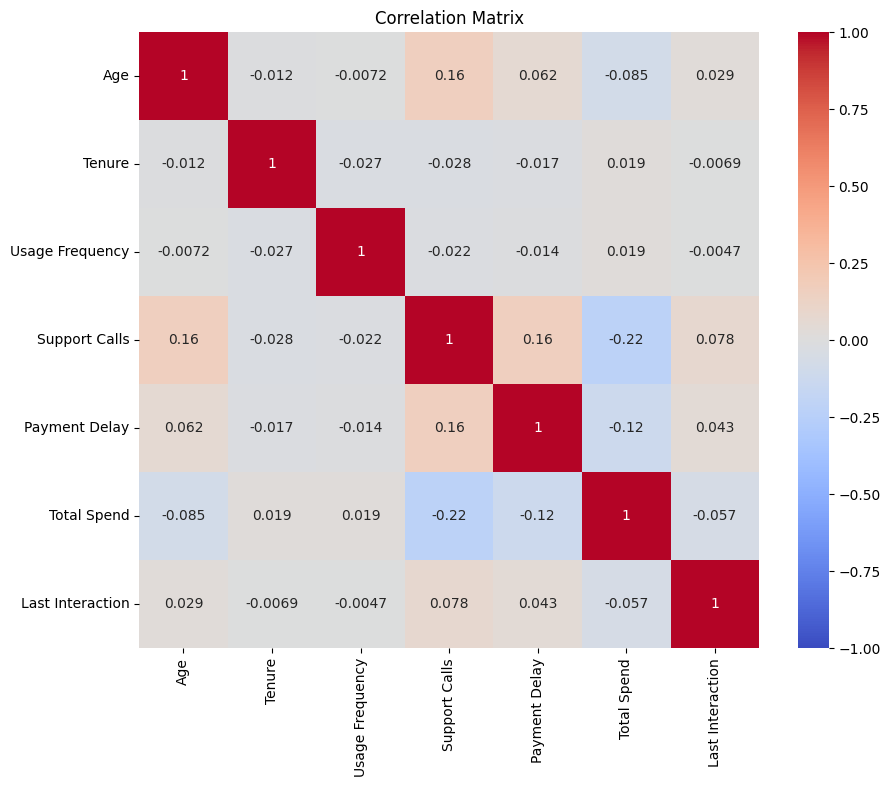

In [79]:
# 상관행렬 계산
corr_matrix = df[cont_columns].corr()

# 히트맵으로 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()


#전처리
라벨링, 원핫 인코딩, 스케일링 등

In [80]:
#female을 0, male을 1로 라벨링

df['Gender'] = df['Gender'].map({'Female': 0, 'Male': 1})


In [81]:
#원핫 인코딩

# cont_columns에 해당하지 않는 컬럼 선택
cat_columns = [col for col in df.columns if col not in cont_columns]
cat_columns.remove('Churn')
cat_columns.remove('Gender')

# 범주형 변수에 대해 원핫 인코딩 적용
df_encoded = pd.get_dummies(df, columns=cat_columns, drop_first=True)

# 결과 확인
print(df_encoded.head())


    Age  Gender  Tenure  Usage Frequency  Support Calls  Payment Delay  \
0  30.0       0    39.0             14.0            5.0           18.0   
1  65.0       0    49.0              1.0           10.0            8.0   
2  55.0       0    14.0              4.0            6.0           18.0   
3  58.0       1    38.0             21.0            7.0            7.0   
4  23.0       1    32.0             20.0            5.0            8.0   

   Total Spend  Last Interaction  Churn  Subscription Type_Premium  \
0        932.0              17.0    1.0                      False   
1        557.0               6.0    1.0                      False   
2        185.0               3.0    1.0                      False   
3        396.0              29.0    1.0                      False   
4        617.0              20.0    1.0                      False   

   Subscription Type_Standard  Contract Length_Monthly  \
0                        True                    False   
1                 

#모델링

## RF

In [86]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score, classification_report

# 독립 변수(X)와 종속 변수(y) 설정
X = df_encoded.drop(columns=['Churn'])  # 'target'은 예측하고자 하는 종속 변수
y = df_encoded['Churn']

# 데이터셋을 훈련셋과 테스트셋으로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 랜덤포레스트 모델 생성
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# 모델 학습
rf_model.fit(X_train, y_train)

# 테스트셋을 통한 예측
y_pred = rf_model.predict(X_test)

# train 평가
train_accuracy = accuracy_score(y_train, rf_model.predict(X_train))
print(f'Train Accuracy: {train_accuracy:.4f}')
train_f1_score = f1_score(y_train, rf_model.predict(X_train))
print(f'Train F1 Score: {train_f1_score:.4f}')

# test 정확도 평가
test_accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {test_accuracy:.4f}')
test_f1_score = f1_score(y_test, y_pred)
print(f'F1 Score: {test_f1_score:.4f}')

# 분류 보고서 출력
print(classification_report(y_test, y_pred))


Train Accuracy: 1.0000
Train F1 Score: 1.0000
Accuracy: 0.9994
F1 Score: 0.9995
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     38063
         1.0       1.00      1.00      1.00     50104

    accuracy                           1.00     88167
   macro avg       1.00      1.00      1.00     88167
weighted avg       1.00      1.00      1.00     88167



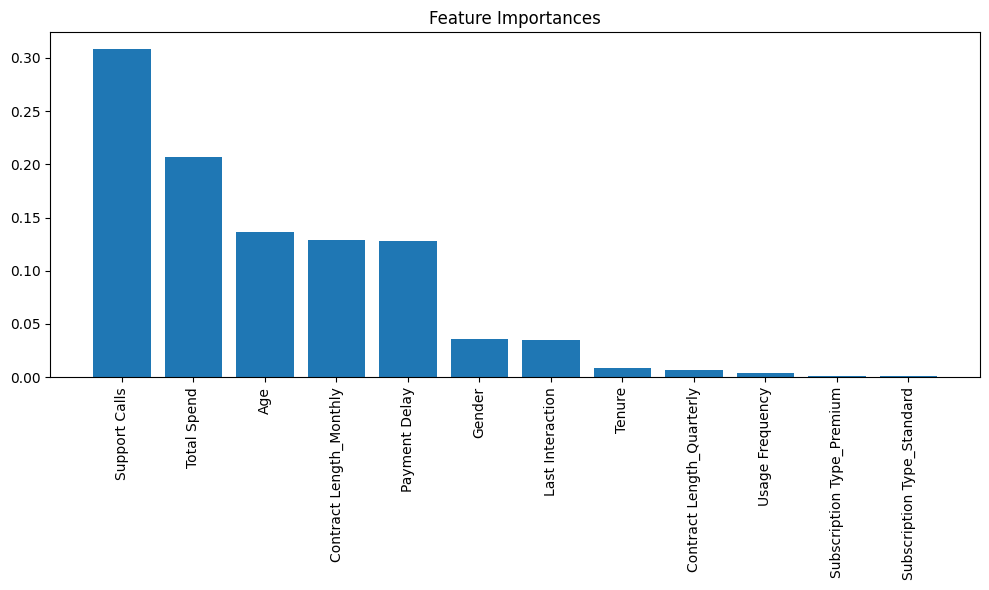

In [95]:
# 변수 중요도 출력
importances = rf_model.feature_importances_
feature_names = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.tight_layout()
plt.show()


## XGBoost

In [89]:
import xgboost as xgb

# 독립 변수(X)와 종속 변수(y) 설정
X = df_encoded.drop(columns=['Churn'])  # 'target'은 예측하고자 하는 종속 변수
y = df_encoded['Churn']

# 데이터셋을 훈련셋과 테스트셋으로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBoost 분류 모델 생성
xgb_model = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# 모델 학습
xgb_model.fit(X_train, y_train)

# 테스트셋을 통한 예측
y_pred = xgb_model.predict(X_test)

# train 평가
train_accuracy = accuracy_score(y_train, xgb_model.predict(X_train))
print(f'Train Accuracy: {train_accuracy:.4f}')
train_f1_score = f1_score(y_train, xgb_model.predict(X_train))
print(f'Train F1 Score: {train_f1_score:.4f}')

# test 정확도 평가
test_accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {test_accuracy:.4f}')
test_f1_score = f1_score(y_test, y_pred)
print(f'F1 Score: {test_f1_score:.4f}')

# 분류 보고서 출력
print(classification_report(y_test, y_pred))


Train Accuracy: 0.9994
Train F1 Score: 0.9995
Accuracy: 0.9994
F1 Score: 0.9994
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     38063
         1.0       1.00      1.00      1.00     50104

    accuracy                           1.00     88167
   macro avg       1.00      1.00      1.00     88167
weighted avg       1.00      1.00      1.00     88167



                       Feature  Importance
6                  Total Spend    0.261999
4                Support Calls    0.220658
10     Contract Length_Monthly    0.209736
5                Payment Delay    0.122328
7             Last Interaction    0.064658
0                          Age    0.050456
9   Subscription Type_Standard    0.028522
1                       Gender    0.021044
2                       Tenure    0.010195
8    Subscription Type_Premium    0.005128
3              Usage Frequency    0.005091
11   Contract Length_Quarterly    0.000185


<Figure size 1200x800 with 0 Axes>

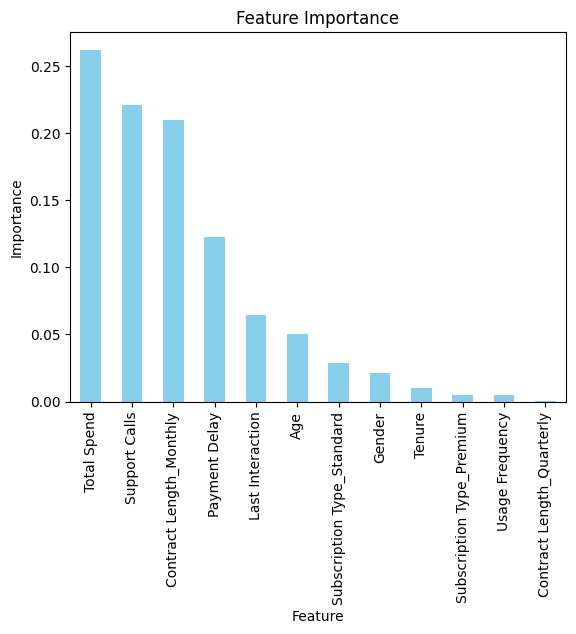

In [97]:
# 변수 중요도 추출
importances = xgb_model.feature_importances_

# 변수 중요도를 데이터프레임으로 변환
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# 변수 중요도 출력
print(importance_df)

# 변수 중요도 시각화
plt.figure(figsize=(12, 8))
importance_df.plot(kind='bar', x='Feature', y='Importance', legend=False, color='skyblue')
plt.title('Feature Importance')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.xticks(rotation=90)
plt.show()

#최종 예측

In [88]:
test_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DAT/24-2/1주차 과제/customer_churn_dataset-testing-master.csv')

In [90]:
test_data.drop('CustomerID', axis=1, inplace=True)

In [91]:
test_data['Gender'] = test_data['Gender'].map({'Female': 0, 'Male': 1})

In [92]:
test_data_encoded = pd.get_dummies(test_data, columns=cat_columns, drop_first=True)

In [94]:
# 독립 변수(X)와 종속 변수(y) 설정
X_final = test_data_encoded.drop(columns=['Churn'])  # 'target'은 예측하고자 하는 종속 변수
y_final = test_data_encoded['Churn']

# 테스트셋에 대한 예측
rf_predictions = rf_model.predict(X_final)
xgb_predictions = xgb_model.predict(X_final)

# 모델 성능 평가
rf_accuracy = accuracy_score(y_final, rf_predictions)
xgb_accuracy = accuracy_score(y_final, xgb_predictions)

print(f'Random Forest Accuracy: {rf_accuracy:.4f}')
print(f'XGBoost Accuracy: {xgb_accuracy:.4f}')

# 분류 보고서 출력
print("\nRandom Forest Classification Report:")
print(classification_report(y_final, rf_predictions))

print("\nXGBoost Classification Report:")
print(classification_report(y_final, xgb_predictions))


Random Forest Accuracy: 0.5037
XGBoost Accuracy: 0.5037

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.06      0.11     33881
           1       0.49      1.00      0.66     30493

    accuracy                           0.50     64374
   macro avg       0.73      0.53      0.38     64374
weighted avg       0.75      0.50      0.37     64374


XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.06      0.11     33881
           1       0.49      1.00      0.66     30493

    accuracy                           0.50     64374
   macro avg       0.73      0.53      0.38     64374
weighted avg       0.75      0.50      0.37     64374



대부분 1로 예측하는 상태 - 데이터가 커서 튜닝 생략